In [55]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from multiprocessing import Pool
import healpy as hp
from astropy.coordinates import SkyCoord
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import random
from sklearn.svm import SVC
from sklearn import svm
from sklearn.pipeline import make_pipeline
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [56]:
 # Importing the dataset containing optical clusters
# df = pd.read_csv('../data/new/awd_not_psz.csv', skiprows = 0, index_col=0)
# df['intensity100'] = np.loadtxt('../data/new/planck_100_rv2_1.csv',delimiter=', ')
# df['intensity143'] = np.loadtxt('../data/new/planck_143_rv1_1.csv',delimiter=', ')
# df['intensity217'] = np.loadtxt('../data/new/planck_217_rv0_1.csv',delimiter=', ')
# df['intensity353'] = np.loadtxt('../data/new/planck_353_2_1.csv',delimiter=', ')
# df['intensity545'] = np.loadtxt('../data/new/planck_545_1_1.csv',delimiter=', ')
# df['intensity857'] = np.loadtxt('../data/new/planck_857_0_1.csv',delimiter=', ')
# df['intensity090_act'] = np.loadtxt('../data/new/act_090_real.csv',delimiter=', ')
# df['intensity150_act'] = np.loadtxt('../data/new/act_150_real.csv',delimiter=', ')
# df['intensity220_act'] = np.loadtxt('../data/new/act_220_real.csv',delimiter=', ')
# df['intensity_rosat'] = np.loadtxt('../data/new/rosat_real.csv',delimiter=', ')
# df['cluster'] = 1

df = pd.read_csv('ml_sample_real.csv', skiprows = 0, index_col=0)
df['intensity100'] = np.loadtxt('../data/beam/real_planck_100.csv',delimiter=', ')
df['intensity143'] = np.loadtxt('../data/beam/real_planck_143.csv',delimiter=', ')
df['intensity217'] = np.loadtxt('../data/beam/real_planck_217.csv',delimiter=', ')
df['intensity353'] = np.loadtxt('../data/beam/real_planck_353.csv',delimiter=', ')
df['intensity545'] = np.loadtxt('../data/beam/real_planck_545.csv',delimiter=', ')
df['intensity857'] = np.loadtxt('../data/beam/real_planck_857.csv',delimiter=', ')
df['intensity090_act'] = np.loadtxt('../data/beam/real_act_090.csv',delimiter=', ')
df['intensity150_act'] = np.loadtxt('../data/beam/real_act_150.csv',delimiter=', ')
df['intensity220_act'] = np.loadtxt('../data/beam/real_act_220.csv',delimiter=', ')
df['intensity_rosat'] = np.loadtxt('../data/beam/real_rosat.csv',delimiter=', ')

df.head()

,amf_z,amf_rh,glat,glon,amf_sn,intensity100,intensity857,intensity143,intensity353,cluster,intensity217,intensity545,intensity090_act,intensity150_act,intensity220_act,intensity_rosat
0,0.2252,200.7117,31.846666,55.602221,24.655148,-0.000010,-0.710562,0.000003,0.001123,1,0.000151,-0.228087,-9999.0,-9999.0,-9999.0,0.175387
1,0.2248,182.3373,41.429880,72.599428,44.674799,-0.000179,-1.489469,-0.000166,0.000744,1,-0.000031,-0.471316,-9999.0,-9999.0,-9999.0,0.154070
2,0.3110,179.1883,65.305106,107.103759,25.696075,-0.000045,-1.691982,-0.000044,0.000596,1,-0.000027,-0.544914,-9999.0,-9999.0,-9999.0,0.080504
3,0.5231,174.7108,-29.646780,100.211077,13.793623,0.000058,2.181829,0.000071,0.001951,1,0.000297,0.710477,-9999.0,-9999.0,-9999.0,0.042015
4,0.2574,172.6889,43.387615,166.090009,20.839521,0.000034,-1.603565,0.000056,0.000845,1,0.000182,-0.493595,-9999.0,-9999.0,-9999.0,0.142775


In [57]:
# Importing the dataset containing non-clusters
# df2 = pd.read_csv('voids_complete.csv', skiprows = 0, index_col=0)
# df2['intensity100'] = np.loadtxt('../data/beam/fake_planck_100.csv',delimiter=', ')
# df2['intensity143'] = np.loadtxt('../data/beam/fake_planck_143.csv',delimiter=', ')
# df2['intensity217'] = np.loadtxt('../data/beam/fake_planck_217.csv',delimiter=', ')
# df2['intensity353'] = np.loadtxt('../data/beam/fake_planck_353.csv',delimiter=', ')
# df2['intensity545'] = np.loadtxt('../data/beam/fake_planck_545.csv',delimiter=', ')
# df2['intensity857'] = np.loadtxt('../data/beam/fake_planck_857.csv',delimiter=', ')
# df2['intensity090_act'] = np.loadtxt('../data/beam/fake_act_090.csv',delimiter=', ')
# df2['intensity150_act'] = np.loadtxt('../data/beam/fake_act_150.csv',delimiter=', ')
# df2['intensity220_act'] = np.loadtxt('../data/beam/fake_act_220.csv',delimiter=', ')
# df2['intensity_rosat'] = np.loadtxt('../data/beam/fake_rosat.csv',delimiter=', ')

df2 = pd.read_csv('voids_complete.csv', skiprows = 0, index_col=0)
df2['intensity100'] = np.loadtxt('../data/new/planck_100_rv2_0.csv',delimiter=', ')
df2['intensity143'] = np.loadtxt('../data/new/planck_143_rv1_0.csv',delimiter=', ')
df2['intensity217'] = np.loadtxt('../data/new/planck_217_rv0_0.csv',delimiter=', ')
df2['intensity353'] = np.loadtxt('../data/new/planck_353_2_0.csv',delimiter=', ')
df2['intensity545'] = np.loadtxt('../data/new/planck_545_1_0.csv',delimiter=', ')
df2['intensity857'] = np.loadtxt('../data/new/planck_857_0_0.csv',delimiter=', ')
df2['intensity090_act'] = np.loadtxt('../data/new/act_090_voids.csv',delimiter=', ')
df2['intensity150_act'] = np.loadtxt('../data/new/act_150_voids.csv',delimiter=', ')
df2['intensity220_act'] = np.loadtxt('../data/new/act_220_voids.csv',delimiter=', ')
df2['intensity_rosat'] = np.loadtxt('../data/new/rosat_voids.csv',delimiter=', ')

df2.head()

,amf_z,amf_rh,glat,glon,amf_sn,intensity100,intensity857,intensity143,intensity353,cluster,intensity217,intensity545,intensity090_act,intensity150_act,intensity220_act,intensity_rosat,amf_ra,amf_dec
0,0.0,0.0,40.494392,115.274128,0.0,-0.000073,0.072511,-0.000064,0.000720,0,-0.000002,0.012514,-9999.0,-9999.0,-9999.0,0.000201,216.251555,75.211946
1,0.0,0.0,29.227784,62.394760,0.0,0.000121,0.025569,0.000135,0.000907,0,0.000214,0.040512,-9999.0,-9999.0,-9999.0,0.000226,265.409675,37.204801
2,0.0,0.0,65.947005,61.001207,0.0,0.000188,0.025393,0.000220,0.000769,0,0.000283,0.009911,-9999.0,-9999.0,-9999.0,0.000312,219.235355,35.949695
3,0.0,0.0,38.687840,338.511642,0.0,0.000052,0.021624,0.000094,0.001594,0,0.000248,0.026058,-9999.0,-9999.0,-9999.0,0.000481,221.093782,-16.258568
4,0.0,0.0,41.756837,342.005285,0.0,0.000075,-0.020548,0.000104,0.001282,0,0.000187,-0.010992,-9999.0,-9999.0,-9999.0,0.000529,221.617441,-12.224860


In [58]:
# Combine real and fake data
df3 = df.append(df2, ignore_index=True)

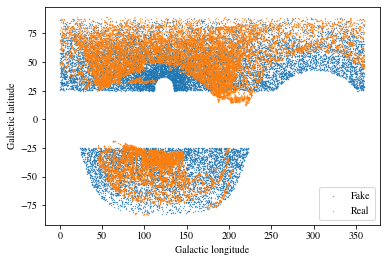

In [59]:
plt.scatter(df2['glon'],df2['glat'],s=0.1,label='Fake')
plt.scatter(df['glon'],df['glat'],s=0.1,label='Real')
plt.xlabel("Galactic longitude")
plt.ylabel("Galactic latitude")
plt.legend()

---

# Classification of clusters vs non clusters

In [60]:
#################################################################################################

# ACT only
intensity_clusters_act = df[(df.intensity090_act!=-9999)&(df.intensity150_act!=-9999)&(df.intensity220_act!=-9999)][['intensity090_act','intensity150_act','intensity220_act', 'intensity545', 'intensity857']][::2].reset_index(drop=True)
intensity_voids_act = df2[(df2.intensity090_act!=-9999)&(df2.intensity150_act!=-9999)&(df2.intensity220_act!=-9999)][['intensity090_act','intensity150_act','intensity220_act', 'intensity545', 'intensity857']][::2].reset_index(drop=True)
intensity_combined_act = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)][['intensity090_act','intensity150_act','intensity220_act', 'intensity545', 'intensity857']][::2].reset_index(drop=True)
cluster_tag_act = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)]['cluster'][::2].reset_index(drop=True)

# Fit full sample with their associated classficiation
clf_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_act.fit(intensity_combined_act, cluster_tag_act)

####################################################

# Planck low-freq
intensity_clusters_pl_low = df[['intensity100','intensity143','intensity217','intensity353']][::2]
intensity_voids_pl_low = df2[['intensity100','intensity143','intensity217','intensity353']][::2]
intensity_combined_pl_low = df3[['intensity100','intensity143','intensity217','intensity353']][::2]
cluster_tag_pl_low = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_low = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_low.fit(intensity_combined_pl_low, cluster_tag_pl_low)

#################################################################################################

# Planck-only
intensity_clusters_pl = df[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857']][::2]
intensity_voids_pl = df2[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857']][::2]
intensity_combined_pl = df3[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857']][::2]
cluster_tag_pl = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl.fit(intensity_combined_pl, cluster_tag_pl)

#####################################################################################################

# Planck+ACT
intensity_clusters_pl_act = df[(df.intensity090_act!=-9999)&(df.intensity150_act!=-9999)&(df.intensity220_act!=-9999)][['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity090_act', 'intensity150_act', 'intensity220_act']][::2]
intensity_voids_pl_act = df2[(df2.intensity090_act!=-9999)&(df2.intensity150_act!=-9999)&(df2.intensity220_act!=-9999)][['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity090_act', 'intensity150_act', 'intensity220_act']][::2]
intensity_combined_pl_act = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)][['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity090_act', 'intensity150_act', 'intensity220_act']][::2]
cluster_tag_pl_act = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_act = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_act.fit(intensity_combined_pl_act, cluster_tag_pl_act)

##########################################################################################################

# Planck+ROSAT
intensity_clusters_pl_ros = df[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity_rosat']][::2]
intensity_voids_pl_ros = df2[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity_rosat']][::2]
intensity_combined_pl_ros = df3[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity_rosat']][::2]
cluster_tag_pl_ros = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf_pl_ros = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_pl_ros.fit(intensity_combined_pl_ros, cluster_tag_pl_ros)

########################################################################################################

# Full
intensity_clusters_full = df[(df.intensity090_act!=-9999)&(df.intensity150_act!=-9999)&(df.intensity220_act!=-9999)][['intensity090_act','intensity100','intensity143','intensity150_act','intensity217','intensity220_act','intensity353','intensity545','intensity857','intensity_rosat']][::2]
intensity_voids_full = df2[(df2.intensity090_act!=-9999)&(df2.intensity150_act!=-9999)&(df2.intensity220_act!=-9999)][['intensity090_act','intensity100','intensity143','intensity150_act','intensity217','intensity220_act','intensity353','intensity545','intensity857','intensity_rosat']][::2]
intensity_combined_full = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)][['intensity090_act','intensity100','intensity143','intensity150_act','intensity217','intensity220_act','intensity353','intensity545','intensity857','intensity_rosat']][::2]
cluster_tag_full = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)]['cluster'][::2]

# Fit full sample with their associated classficiation
clf_full = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_full.fit(intensity_combined_full, cluster_tag_full)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [61]:
# ACT-only
cluster_act = np.array([clf_act.predict([[i090, i150, i220, i545, i857]]) for i090, i150, i220, i545, i857 in intensity_clusters_act[1::2].values]).flatten()

# Low-freq Planck
cluster_pl_low = np.array([clf_pl_low.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in intensity_clusters_pl_low[1::2].values]).flatten()

# Planck-only
cluster_pl = np.array([clf_pl.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in intensity_clusters_pl[1::2].values]).flatten()

# Planck+ACT
cluster_pl_act = np.array([clf_pl_act.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i220]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in intensity_clusters_pl_act[1::2].values]).flatten()

# Planck+ROSAT
cluster_pl_ros = np.array([clf_pl_ros.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in intensity_clusters_pl_ros[1::2].values]).flatten()

# Full
cluster_full = np.array([clf_full.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in intensity_clusters_full[1::2].values]).flatten()

In [62]:
# ACT-only
no_cluster_act = np.array([clf_act.predict([[i090, i150, i220, i545, i857]]) for i090, i150, i220, i545, i857 in intensity_voids_act[1::2].values]).flatten()

# # Low-freq Planck
no_cluster_pl_low = np.array([clf_pl_low.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in intensity_voids_pl_low[1::2].values]).flatten()

# Planck-only
no_cluster_pl = np.array([clf_pl.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in intensity_voids_pl[1::2].values]).flatten()

# Planck+ACT
no_cluster_pl_act = np.array([clf_pl_act.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i220]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in intensity_voids_pl_act[1::2].values]).flatten()

# Planck+ROSAT
no_cluster_pl_ros = np.array([clf_pl_ros.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in intensity_voids_pl_ros[1::2].values]).flatten()

# Full
no_cluster_full = np.array([clf_full.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in intensity_voids_full[1::2].values]).flatten()

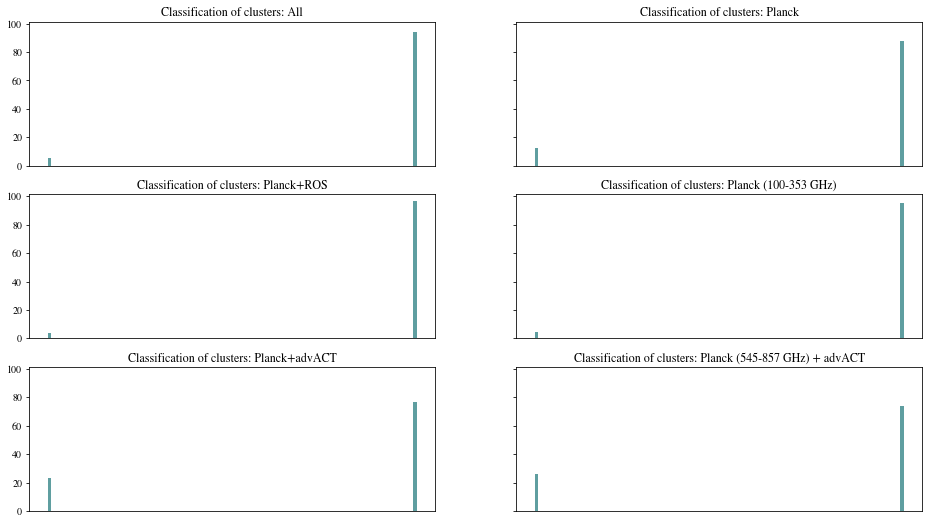

In [63]:
fig, ax = plt.subplots(3,2,figsize=(16,9),sharey=True)

ax[0,0].hist(cluster_full,bins=100,range=(0,1),color='cadetblue',density=True,label='Full')
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].set_title("Classification of clusters: All")

ax[1,0].hist(cluster_pl_ros,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ROS')
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].set_title("Classification of clusters: Planck+ROS")

ax[2,0].hist(cluster_pl_act,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ACT')
ax[2,0].get_xaxis().set_visible(False)
ax[2,0].set_title("Classification of clusters: Planck+advACT")

ax[0,1].hist(cluster_pl,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl')
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].set_title("Classification of clusters: Planck")

ax[1,1].hist(cluster_pl_low,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl (100-353)')
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].set_title("Classification of clusters: Planck (100-353 GHz)")

ax[2,1].hist(cluster_act,bins=100,range=(0,1),color='cadetblue',density=True,label='ACT')
ax[2,1].get_xaxis().set_visible(False)
ax[2,1].set_title("Classification of clusters: Planck (545-857 GHz) + advACT")

plt.savefig('class_clusters.png')
plt.show()

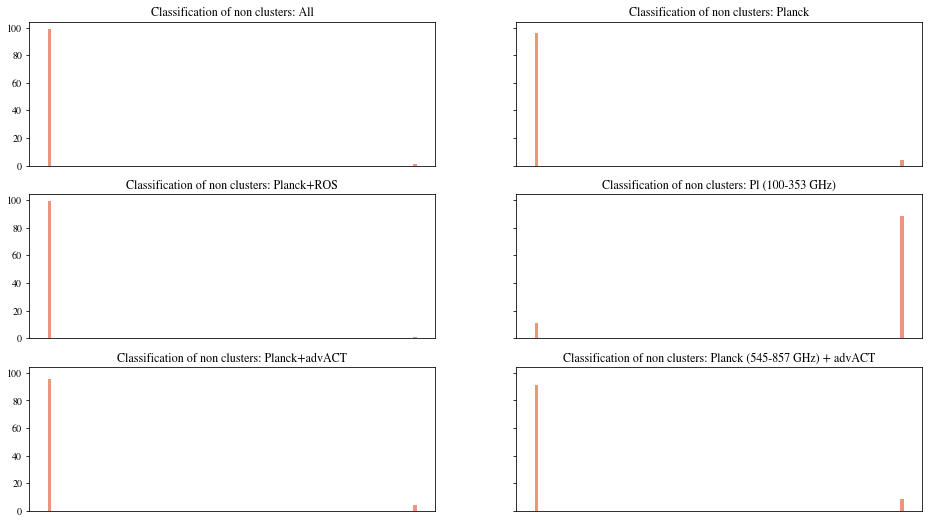

In [64]:
fig, ax = plt.subplots(3,2,figsize=(16,9),sharey=True)

ax[0,0].hist(no_cluster_full,bins=100,range=(0,1),color='darksalmon',density=True,label='Full')
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].set_title("Classification of non clusters: All")

ax[1,0].hist(no_cluster_pl_ros,bins=100,range=(0,1),color='darksalmon',density=True,label='Pl+ROS')
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].set_title("Classification of non clusters: Planck+ROS")

ax[2,0].hist(no_cluster_pl_act,bins=100,range=(0,1),color='darksalmon',density=True,label='Pl+ACT')
ax[2,0].get_xaxis().set_visible(False)
ax[2,0].set_title("Classification of non clusters: Planck+advACT")

ax[0,1].hist(no_cluster_pl,bins=100,range=(0,1),color='darksalmon',density=True,label='Pl')
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].set_title("Classification of non clusters: Planck")

ax[1,1].hist(no_cluster_pl_low,bins=100,range=(0,1),color='darksalmon',density=True,label='Pl (100-353)')
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].set_title("Classification of non clusters: Pl (100-353 GHz)")

ax[2,1].hist(no_cluster_act,bins=100,range=(0,1),color='darksalmon',density=True,label='ACT')
ax[2,1].get_xaxis().set_visible(False)
ax[2,1].set_title("Classification of non clusters: Planck (545-857 GHz) + advACT")

plt.savefig('class_nonclusters.png')
plt.show()

---

# Identification of clusters

In [11]:
# Csv importer wrapped in a function that can be mapped for parallelization
def read_csv(filename):
    return pd.DataFrame(np.loadtxt(filename,delimiter=', ')).T

In [12]:
links100 = ['../data/results100_1.csv','../data/results100_2.csv','../data/results100_3.csv',
         '../data/results100_4.csv','../data/results100_5.csv','../data/results100_6.csv',
         '../data/results100_7.csv','../data/results100_8.csv','../data/results100_9.csv',
         '../data/results100_10.csv']
links143 = ['../data/results143_1.csv','../data/results143_2.csv','../data/results143_3.csv',
         '../data/results143_4.csv','../data/results143_5.csv','../data/results143_6.csv',
         '../data/results143_7.csv','../data/results143_8.csv','../data/results143_9.csv',
         '../data/results143_10.csv']
links353 = ['../data/results353_1.csv','../data/results353_2.csv','../data/results353_3.csv',
         '../data/results353_4.csv','../data/results353_5.csv','../data/results353_6.csv',
         '../data/results353_7.csv','../data/results353_8.csv','../data/results353_9.csv',
         '../data/results353_10.csv']
links545 = ['../data/results545_1.csv','../data/results545_2.csv','../data/results545_3.csv',
         '../data/results545_4.csv','../data/results545_5.csv','../data/results545_6.csv',
         '../data/results545_7.csv','../data/results545_8.csv','../data/results545_9.csv',
         '../data/results545_10.csv']
links857 = ['../data/results857_1.csv','../data/results857_2.csv','../data/results857_3.csv',
         '../data/results857_4.csv','../data/results857_5.csv','../data/results857_6.csv',
         '../data/results857_7.csv','../data/results857_8.csv','../data/results857_9.csv',
         '../data/results857_10.csv']

linksrosat = ['../voids_y_rosat_full_sky.csv']
links090 = ['../voids_y_act90_full_sky.csv']
links150 = ['../voids_y_150_full_sky.csv']
links220 = ['../voids_y_220_full_sky.csv']
links217 = ['voids_y_217_full_sky.csv']

In [13]:
data090 = pd.DataFrame()
data100 = pd.DataFrame()
data143 = pd.DataFrame()
data150 = pd.DataFrame()
data217 = pd.DataFrame()
data220 = pd.DataFrame()
data353 = pd.DataFrame()
data545 = pd.DataFrame()
data857 = pd.DataFrame()
datarosat = pd.DataFrame()

for links in [links090,links100,links143,links150,links217,links220,links353,links545,links857,linksrosat]:
    if links==links090:
        for link in links:
            data090 = pd.concat([data090,pd.DataFrame(np.loadtxt(link,delimiter=', '))])    
    if links==links100:
        for link in links:
            data100 = pd.concat([data100,pd.DataFrame(np.loadtxt(link,delimiter=', ')).T])
    if links==links143:
        for link in links:
            data143 = pd.concat([data143,pd.DataFrame(np.loadtxt(link,delimiter=', ')).T])
    if links==links150:
        for link in links:
            data150 = pd.concat([data150,pd.DataFrame(np.loadtxt(link,delimiter=', '))])
    if links==links217:
        for link in links:
            data217 = pd.concat([data217,pd.DataFrame(np.loadtxt(link,delimiter=', '))])
    if links==links220:
        for link in links:
            data220 = pd.concat([data220,pd.DataFrame(np.loadtxt(link,delimiter=', '))])            
    if links==links353:
        for link in links:
            data353 = pd.concat([data353,pd.DataFrame(np.loadtxt(link,delimiter=', ')).T])
    if links==links545:
        for link in links:
            data545 = pd.concat([data545,pd.DataFrame(np.loadtxt(link,delimiter=', ')).T])
    if links==links857:
        for link in links:
            data857 = pd.concat([data857,pd.DataFrame(np.loadtxt(link,delimiter=', ')).T])            
    if links==linksrosat:
        for link in links:
            datarosat = pd.concat([datarosat,pd.DataFrame(np.loadtxt(link,delimiter=', '))])


In [14]:
# Convert the RA and DEC to galactic coordinates
c = SkyCoord(data100[1],data100[2],frame='icrs',unit='deg')
data100['glat'] = c.galactic.b.degree
data100['glon'] = c.galactic.l.degree

In [15]:
# initialize data of lists.
data_all = {'glat':data100['glat'].values,
            'glon':data100['glon'].values,
            'int090':data090[0].values,
            'int100':data100[0].values,
            'int143':data143[0].values,
            'int150':data150[0].values,
            'int217':data217[0].values,
            'int220':data220[0].values,
            'int353':data353[0].values,
            'int545':data545[0].values,
            'int857':data857[0].values,
            'introsat':datarosat[0].values}
 
fsky = pd.DataFrame(data_all)

In [67]:
fsky = pd.DataFrame()
fsky['ras'] = np.loadtxt('../data/new/ras_voids_plfsky.csv',delimiter=', ')
fsky['decs'] = np.loadtxt('../data/new/decs_voids_plfsky.csv',delimiter=', ')

# Convert the RA and DEC to galactic coordinates
c = SkyCoord(fsky['ras'],fsky['decs'],frame='icrs',unit='deg')
fsky['glat'] = c.galactic.b.degree
fsky['glon'] = c.galactic.l.degree

In [16]:
fsky['int100'] = np.loadtxt('../data/new/fsky_planck_100.csv',delimiter=', ')
fsky['int143'] = np.loadtxt('../data/new/fsky_planck_143.csv',delimiter=', ')
fsky['int217'] = np.loadtxt('../data/new/fsky_planck_217.csv',delimiter=', ')
fsky['int353'] = np.loadtxt('../data/new/fsky_planck_353.csv',delimiter=', ')
fsky['int545'] = np.loadtxt('../data/new/fsky_planck_545.csv',delimiter=', ')
fsky['int857'] = np.loadtxt('../data/new/fsky_planck_857.csv',delimiter=', ')
fsky['int090'] = np.loadtxt('../data/new/fsky_act_090.csv',delimiter=', ')
fsky['int150'] = np.loadtxt('../data/new/fsky_act_150.csv',delimiter=', ')
fsky['int220'] = np.loadtxt('../data/new/fsky_act_220.csv',delimiter=', ')
fsky['introsat'] = np.loadtxt('../data/new/fsky_rosat.csv',delimiter=', ')

In [17]:
fsky

,glat,glon,int090,int100,int143,int150,int217,int220,int353,int545,int857,introsat
0,-27.128252,302.931925,-9999.0,-0.000076,-0.000041,-9999.0,0.000203,-9999.0,0.002477,1.499063,4.390008,0.000281
1,-27.128252,302.931925,-9999.0,-0.000076,-0.000041,-9999.0,0.000203,-9999.0,0.002478,1.498831,4.389964,0.000279
2,-27.128252,302.931925,-9999.0,-0.000077,-0.000041,-9999.0,0.000203,-9999.0,0.002479,1.498386,4.389166,0.000274
3,-27.128252,302.931925,-9999.0,-0.000077,-0.000041,-9999.0,0.000204,-9999.0,0.002480,1.497773,4.387668,0.000266
4,-27.128252,302.931925,-9999.0,-0.000077,-0.000041,-9999.0,0.000204,-9999.0,0.002480,1.497111,4.385730,0.000259
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,27.128252,122.931925,-9999.0,0.000034,0.000097,-9999.0,0.000384,-9999.0,0.002874,1.702165,4.891022,0.000043
59996,27.128252,122.931925,-9999.0,0.000034,0.000097,-9999.0,0.000383,-9999.0,0.002874,1.702524,4.892914,0.000044
59997,27.128252,122.931925,-9999.0,0.000034,0.000097,-9999.0,0.000383,-9999.0,0.002875,1.703200,4.895209,0.000044
59998,27.128252,122.931925,-9999.0,0.000035,0.000097,-9999.0,0.000383,-9999.0,0.002877,1.704075,4.897508,0.000044


In [18]:
# All
cluster_prob_full = np.array([clf_full.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in fsky[['int100','int143','int217','int353', 'int545', 'int857', 'int090', 'int150', 'int220', 'introsat']].values]).flatten()

# Planck+ROSAT
cluster_prob_pl_ros = np.array([clf_pl_ros.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in fsky[['int100','int143','int217','int353', 'int545', 'int857', 'introsat']].values]).flatten()

# Planck+ACT
cluster_prob_pl_act = np.array([clf_pl_act.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i150]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in fsky[['int100','int143','int217','int353', 'int545', 'int857', 'int090', 'int150', 'int220']].values]).flatten()

# Planck-only
cluster_prob_pl = np.array([clf_pl.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in fsky[['int100','int143','int217','int353', 'int545', 'int857']].values]).flatten()

# # ACT-only
cluster_prob_act = np.array([clf_act.predict([[i090, i150, i220]]) for i090,i150,i220 in fsky[['int090','int150','int220']].values]).flatten()

# Low-freq Planck
cluster_prob_pl_low = np.array([clf_pl_low.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in fsky[['int100','int143','int217','int353']].values]).flatten()

ValueError: operands could not be broadcast together with shapes (1,3) (5,) (1,3) 

In [ ]:
fsky['cluster_full'] = cluster_prob_full
fsky['cluster_pl_ros'] = cluster_prob_pl_ros
fsky['cluster_pl_act'] = cluster_prob_pl_act
fsky['cluster_pl'] = cluster_prob_pl
fsky['cluster_pl_low'] = cluster_prob_pl_low
fsky['cluster_act'] = cluster_prob_act

In [ ]:
pl143 = hp.read_map('../data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits')

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Full')
hp.visufunc.projscatter(fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glon'],fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glat'],c=fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['cluster_full'],lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Pl+ROS')
hp.visufunc.projscatter(fsky['glon'],fsky['glat'],c=cluster_prob_pl_ros,lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Pl+ACT')
hp.visufunc.projscatter(fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glon'],fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glat'],c=fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['cluster_pl_act'],lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Pl')
hp.visufunc.projscatter(fsky['glon'],fsky['glat'],c=cluster_prob_pl,lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Pl (100-353)')
hp.visufunc.projscatter(fsky['glon'],fsky['glat'],c=cluster_prob_pl_low,lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='ACT')
hp.visufunc.projscatter(fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glon'],fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glat'],c=fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['cluster_act'],lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)